# Image watermark into binary format


## Convert the image into np array


In [ ]:
import cv2

#read image
img_grey = cv2.imread('watermark50.png', cv2.IMREAD_GRAYSCALE)

# define a threshold, 128 is the middle of black and white in grey scale
thresh = 128

# threshold the image
img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]

#save image
cv2.imwrite('watermarkBinary.png',img_binary)


True

Populating the interactive namespace from numpy and matplotlib


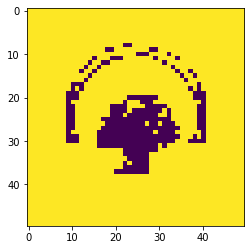

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('watermarkBinary.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
cv2.imwrite("watermarkBW.png", img_grey)

True

In [ ]:
from PIL import Image
import numpy as np

img= Image.open("watermarkBinary.png")
# Convert Image to Numpy as array
imgBin = np.array(img)
# Put threshold to make it binary
print(len(imgBin))

50


In [ ]:
imgBinary = np.array(imgBin)
imgBinary.shape

(50, 50)

In [ ]:
WMKstring = ""
for i in range(0,50):
  for j in range(0,50):
    WMKstring = WMKstring + str(imgBinary[i][j])+ ","



In [ ]:
len(WMKstring)

9420

# Implement Neural Network

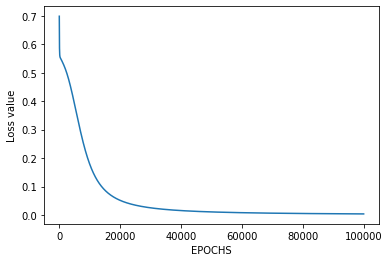

In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
	W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
	W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
	b1 = np.zeros((neuronsInHiddenLayers, 1))
	b2 = np.zeros((outputFeatures, 1))

	parameters = {"W1" : W1, "b1": b1,
				"W2" : W2, "b2": b2}
	return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
	m = X.shape[1]
	W1 = parameters["W1"]
	W2 = parameters["W2"]
	b1 = parameters["b1"]
	b2 = parameters["b2"]

	Z1 = np.dot(W1, X) + b1  # Neuron 1 calculations
	A1 = sigmoid(Z1)
	Z2 = np.dot(W2, A1) + b2 # Neuron 2 calculations
	A2 = sigmoid(Z2)

	cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
	logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
	cost = -np.sum(logprobs) / m
	return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
	m = X.shape[1]
	(Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

	dZ2 = A2 - Y
	dW2 = np.dot(dZ2, A1.T) / m
	db2 = np.sum(dZ2, axis = 1, keepdims = True)

	dA1 = np.dot(W2.T, dZ2)
	dZ1 = np.multiply(dA1, A1 * (1- A1))
	dW1 = np.dot(dZ1, X.T) / m
	db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

	gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
				"dZ1": dZ1, "dW1": dW1, "db1": db1}
	return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
	parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
	parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
	parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
	parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
	return parameters

# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
	losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, cache)
	parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()




In [ ]:
# Testing
X = np.array([[0], [1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)
prediction.dtype


[[0.]]


dtype('float64')

# Watermarking Technique

In [ ]:

# We will use wave package available in native Python installation to read and write .wav audio file
import wave
# read wave audio file
song = wave.open("InputAudioFile.wav", mode='rb')
# Read frames and convert to byte array
frame_bytes = bytearray(list(song.readframes(song.getnframes())))

string = WMKstring



# The "secret" text message

# Append dummy data to fill out rest of the bytes. Receiver shall detect and remove these characters.
string = string + int((len(frame_bytes)-(len(string)*8*8))/8) *'#'
# Convert text to bit array
bits = list(map(int, ''.join([bin(ord(i)).lstrip('0b').rjust(8,'0') for i in string])))
# Testing
X = np.array([[1], [1]]) # AND input

# cost, _, A2 = forwardPropagation(X, Y, parameters)
# prediction = (A2 > 0.5) * 1.0

# Replace LSB of each byte of the audio data by one bit from the text bit array
for i, bit in enumerate(bits):

    prediction = (frame_bytes[i] & 254)



    frame_bytes[i] = (prediction) | bit
# Get the modified bytes
frame_modified = bytes(frame_bytes)

# Write bytes to a new wave audio file
with wave.open('song_embedded.wav', 'wb') as fd:
    fd.setparams(song.getparams())
    fd.writeframes(frame_modified)
song.close()

# Decoding the watermark

In [ ]:
#print(np.fromstring(ts, dtype=int))
# Use wave package (native to Python) for reading the received audio file
import wave
song = wave.open("song_embedded.wav", mode='rb')
# Convert audio to byte array
frame_bytes = bytearray(list(song.readframes(song.getnframes())))

# Extract the LSB of each byte
extracted = [frame_bytes[i] & 1 for i in range(len(frame_bytes))]
# Convert byte array back to string
string = "".join(chr(int("".join(map(str,extracted[i:i+8])),2)) for i in range(0,len(extracted),8))
# Cut off at the filler characters
decoded = string.split("###")[0]

# Print the extracted text
print("Sucessfully decoded: "+decoded)
song.close()

Sucessfully decoded: 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255

In [ ]:
# decodedNP = np.array(decoded)
type(decoded)

str

In [ ]:
len(decoded)

9420

In [ ]:
my_string = decoded
my_list = my_string.split(",")
final_list = my_list[0:2500]
print(final_list)



['255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255', '255'

In [ ]:
shape(final_list)
arr_2d = np.reshape(final_list, (50, 50))
shape(arr_2d)

(50, 50)

In [ ]:
# img = Image.fromarray(imgdecoded)
# img.save('my.png')
# img.show()

new_p = Image.fromarray((arr_2d).astype(np.uint8))
new_p = new_p.convert("L")
new_p.save('my.png')
new_p.show()


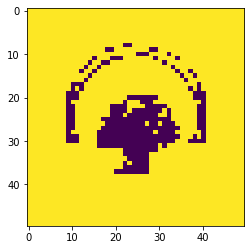

In [ ]:
img = mpimg.imread('my.png')
imgplot = plt.imshow(img)
plt.show()